In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

import pandas as pd
data = pd.read_csv('/content/drive/My Drive/Major Project/train.csv')
df = data

In [ ]:
import re
for i in range(len(df)):
    df['comment_text'][i] = re.sub(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', "", df['comment_text'][i])
    df['comment_text'][i] = re.sub(r'[^A-Za-z0-9\s]', '', df['comment_text'][i])
    df['comment_text'][i] = re.sub(r'@\w+', '', df['comment_text'][i])
    df['comment_text'][i] = re.sub(r'\d+', '', df['comment_text'][i])
    df['comment_text'][i] =  re.sub(r'\n', '  ', df['comment_text'][i])

Streaming output truncated to the last 5000 lines.
<ipython-input-3-711089624cb2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['comment_text'][i] = re.sub(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', "", df['comment_text'][i])
<ipython-input-3-711089624cb2>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['comment_text'][i] = re.sub(r'[^A-Za-z0-9\s]', '', df['comment_text'][i])
<ipython-input-3-711089624cb2>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/panda

In [ ]:
df.columns

Index(['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat',
       'insult', 'identity_hate'],
      dtype='object')

In [ ]:
df.drop(columns=['id'],inplace=True)

In [ ]:
df.head()

comment_text  toxic  severe_toxic  \
0  Explanation  Why the edits made under my usern...      0             0   
1  Daww He matches this background colour Im seem...      0             0   
2  Hey man Im really not trying to edit war Its j...      0             0   
3    More  I cant make any real suggestions on im...      0             0   
4  You sir are my hero Any chance you remember wh...      0             0   

   obscene  threat  insult  identity_hate  
0        0       0       0              0  
1        0       0       0              0  
2        0       0       0              0  
3        0       0       0              0  
4        0       0       0              0

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df

comment_text  toxic  \
0       Explanation  Why the edits made under my usern...      0   
1       Daww He matches this background colour Im seem...      0   
2       Hey man Im really not trying to edit war Its j...      0   
3         More  I cant make any real suggestions on im...      0   
4       You sir are my hero Any chance you remember wh...      0   
...                                                   ...    ...   
159566  And for the second time of asking when your vi...      0   
159567  You should be ashamed of yourself     That is ...      0   
159568  Spitzer     Umm theres no actual article for p...      0   
159569  And it looks like it was actually you who put ...      0   
159570    And  I really dont think you understand  I c...      0   

        severe_toxic  obscene  threat  insult  identity_hate  
0                  0        0       0       0              0  
1                  0        0       0       0              0  
2                  0        0       0       0              0  
3                  0        0       0       0              0  
4                  0        0       0       0              0  
...              ...      ...     ...     ...            ...  
159566             0        0       0       0              0  
159567             0        0       0       0              0  
159568             0        0       0       0              0  
159569             0        0       0       0              0  
159570             0        0       0       0              0  

[159571 rows x 7 columns]

In [ ]:
# Assuming df is your DataFrame
# Define 'Has_1' column indicating presence of any toxic feature
columns_to_check = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
df['Has_1'] = df[columns_to_check].apply(lambda row: 1 if 1 in row.values else 0, axis=1)

# Drop toxic feature columns from the DataFrame
df.drop(columns=columns_to_check, inplace=True)

X = df['comment_text']
y = df[['Has_1']]

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert comment text into numerical features using TF-IDF vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=10000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Classification Report for Hate:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97     28671
           1       0.91      0.57      0.70      3244

    accuracy                           0.95     31915
   macro avg       0.93      0.78      0.84     31915
weighted avg       0.95      0.95      0.95     31915

Confusion Matrix for Hate:
 [[28498   173]
 [ 1384  1860]]


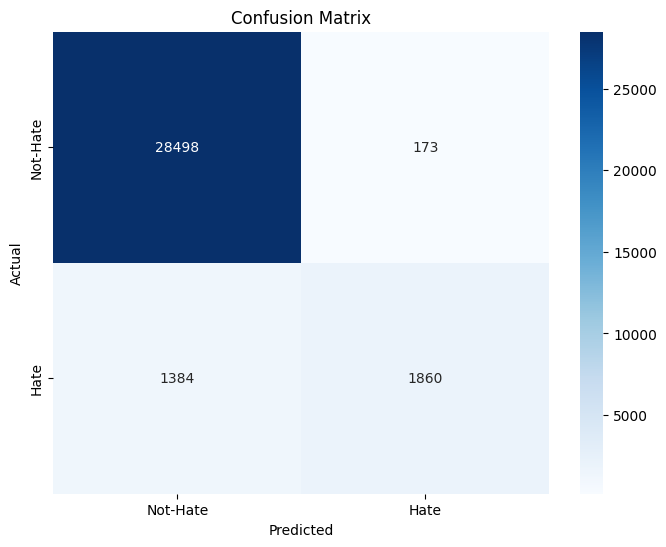

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize the gradient boosting classifier with a higher number of epochs
gb_clf = GradientBoostingClassifier(n_estimators=100,max_depth=10)

# Training the model using balanced data
gb_clf.fit(X_train_tfidf, y_train)

# Making predictions on the test set
y_pred = gb_clf.predict(X_test_tfidf)

# Generating a classification report
report = classification_report(y_test['Has_1'], y_pred)
print("Classification Report for Hate:\n", report)

# Generating the confusion matrix
conf_matrix = confusion_matrix(y_test['Has_1'], y_pred)
print("Confusion Matrix for Hate:\n", conf_matrix)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not-Hate', 'Hate'], yticklabels=['Not-Hate', 'Hate'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
import numpy as np

# Take user input
user_input = input("Enter a comment: ")

# Convert user input into a DataFrame
user_df = pd.DataFrame({'comment_text': [user_input]})

# Convert comment text into numerical features using TF-IDF vectorization
user_tfidf = tfidf_vectorizer.transform(user_df['comment_text'])

# Making predictions on user input
user_pred = gb_clf.predict(user_tfidf)

# Displaying the prediction
toxicity_labels = ['Not Hate', 'Hate']
predicted_label = toxicity_labels[user_pred[0]]
print("Predicted Hate Label:", predicted_label)


Enter a comment: you are a ugly son of a bitch
Predicted Hate Label: Hate
